# <p style="text-align: left;"> <span style="font-family:consolas">Deep Learning _ Final Project on <font color = purple > TRANSFER LEARNING  (PART 2)</span>  </p>
***

> ## Members: 
        > ### <font color = blue > <span style="font-family:consolas"> Amanuel Abrdo Tereda </font>
        > ### <font color = blue > <span style="font-family:consolas"> Stefalo Acha </font>
***
> *Date: May 02, 2023*
> ### <p style="text-align: right;">Instructor: <font color = blue > Dr. Letu Qingge</p>
***



## Image classification with KERAS 

> **Without scaling the dataset using STD (Standard deviation)**
***

In [1]:
import numpy as np
import cv2
import pandas as pd
import PIL.Image as Image
import os
import matplotlib.pylab as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from tensorflow import keras

In [2]:
# cache_dir indicates where to download data.'.' means current directory
# 'untar=true' will unzip it

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 [==============================] - 10s 0us/step


In [3]:
import pathlib
data_dir = pathlib.Path(data_dir)

list_images = list(data_dir.glob('*/*.jpg'))
image_count = len(list_images)

In [4]:
image_count = len(list_images)
image_count

3670

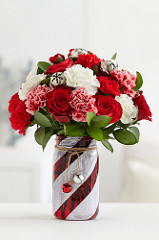

In [5]:
roses = list(data_dir.glob('roses/*'))
Image.open(str(roses[33]))

In [6]:
#Make up python dictionary

flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

#Creating a label directory

flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [7]:
class_names = list(flowers_labels_dict.keys())

class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

print(class_names_label)


{'roses': 0, 'daisy': 1, 'dandelion': 2, 'sunflowers': 3, 'tulips': 4}


In [8]:
# Check one of the images for their size

img = str(flowers_images_dict['roses'][0])
img = cv2.imread(img)

img.shape

(333, 500, 3)

In [9]:
# Resize all images using for loop

IMAGE_SHAPE = (224,224)
#IMAGE_SHAPE = (28,28)
#IMAGE_SHAPE = (112,112)

x, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        
        
        resized_img = cv2.resize(img,(IMAGE_SHAPE)) #IMAGE_SHAPE = (224,224)
        
        x.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [10]:
x[0].shape

(224, 224, 3)

In [11]:
x_array = np.array(x)
y_array = np.array(y)

In [ ]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    figsize= (20,20)
    fig = plt.figure(figsize=figsize)
    fig.suptitle("Some examples if images of the dataset0", fontsize=16)
    for i in range(36):
        plt.subplot(6,6,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        
        #image = cv2.resize(images[i], figsize)
        #plt.imshow(image.astype(np.uint8))#. cmap=plt.cm.binary)

        plt.imshow(images[i].astype(np.uint8))#. cmap=plt.cm.binary)

        plt.xlabel(class_names[labels[i]])
    plt.show()
display_examples(class_names, x, y)

In [ ]:
# Resize all images using for loop

#IMAGE_SHAPE = (224,224)
IMAGE_SHAPE = (28,28)
#IMAGE_SHAPE = (112,112)

x, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        
        
        resized_img = cv2.resize(img,(IMAGE_SHAPE)) #IMAGE_SHAPE = (224,224)
        
        x.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [ ]:
x_array = np.array(x)
y_array = np.array(y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_array, y_array, test_size=1/3, random_state=25) # Without STD

In [ ]:
x_train.shape[1]

28

In [ ]:
#verify
print("shape of input  - training set =", x_train.shape)
print("shape of output - training set =", y_train.shape)
print("shape of input  - testing set  =", x_test.shape)
print("shape of output - testing set  =", y_test.shape)

shape of input  - training set = (2446, 28, 28, 3)
shape of output - training set = (2446,)
shape of input  - testing set  = (1224, 28, 28, 3)
shape of output - testing set  = (1224,)


In [ ]:
model = tf.keras.Sequential([ 
    tf.keras.layers.Conv2D(1028, (3,3), activation = 'relu', input_shape = (x_train.shape[1],x_train.shape[1],3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(5, activation=tf.nn.softmax)
    
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 1028)      28784     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 1028)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 512)       4737536   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 512)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 12800)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# model_fit = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, shuffle=True)
# print("")
# print("Model evaluation based on the test dataset:")
# model.evaluate(x_test, y_test)

In [ ]:
model_fit = model.fit(x_train, y_train, epochs = 20, validation_split = 0.2, batch_size=77)
print("")
print("Model evaluation based on the test dataset:")
model.evaluate(x_test, y_test)

In [ ]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the Neural Network
    """
    #fig = plt.figure(figsize=(10,5))
    
    
    # Plot accuracy
    #plt.subplot(221)
    plt.plot(model_fit.history['accuracy'], 'bo--', label = "acc")
    plt.plot(model_fit.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()
    plt.grid()
    plt.figure()

    
    # Plot loss function
    #plt.subplot(222)
    plt.plot(model_fit.history['loss'], 'bo--', label = "loss")
    plt.plot(model_fit.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")
    plt.legend()
    plt.grid()
    plt.figure()

In [ ]:
plot_accuracy_loss(model_fit)

In [ ]:
# Plot training loss curve
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Mean square loss')
plt.legend(['Train','validation'])
plt.title('Loss plot')
plt.grid()
plt.figure()

# Plot Accuracy plot
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train accuracy','Validation accuracy'])
plt.title('Accuracy plot')
plt.grid()
plt.figure()

In [ ]:
y_predicted = model.predict(x_test)

y_predicted_labels = [np.argmax(i) for i in y_predicted]

flower_classes=[ ]

for i in y_predicted_labels: 
    a = class_names[y_predicted_labels[i]]
    flower_classes.append(a)

flower_labels = class_names

In [ ]:
import seaborn as sn

cm = tf.math.confusion_matrix(y_test, y_predicted_labels)

cm_df = pd.DataFrame(cm,
                     index = flower_labels,
                     columns = flower_labels)

#Plotting the confusion matrix
plt.figure(figsize=(10,7))
sn.heatmap(cm_df, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()
